In [1]:
import os
import subprocess
import sys
sys.path.append('../')
import facenet.contributed.face as face
from imageio import imread, imwrite
from os import listdir
from os.path import isfile, join
from shutil import copy
import pandas as pd

test_root = os.path.abspath('../test_data/ridiculous6/')
test_pics = os.path.join(test_root, 'flattened/')

pic_list = listdir(test_pics)

/home/alex/Documents/CS230DeepActor/venv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# rename pics, temporary code, run once
# for i, pic in enumerate(pic_list):
#     filepath = os.path.join(test_pics, pic)
#     os.rename(filepath, os.path.join(test_pics, '{}.png'.format(i)))

In [11]:
picdf = pd.DataFrame(pic_list)
picdf.head

<bound method NDFrame.head of            0
0     45.png
1   pics.csv
2     50.png
3     75.png
4      4.png
5     59.png
6     69.png
7     47.png
8     24.png
9     30.png
10    17.png
11    18.png
12     3.png
13    70.png
14    53.png
15    72.png
16    81.png
17    46.png
18    11.png
19    39.png
20    68.png
21    58.png
22    43.png
23    76.png
24    27.png
25    78.png
26    41.png
27    14.png
28    25.png
29    36.png
..       ...
56    57.png
57    26.png
58    77.png
59    64.png
60    29.png
61    31.png
62    23.png
63    66.png
64    79.png
65    44.png
66    56.png
67    84.png
68    28.png
69    10.png
70    20.png
71    13.png
72    15.png
73    49.png
74    12.png
75    32.png
76    19.png
77    60.png
78     1.png
79     6.png
80    82.png
81    33.png
82    16.png
83    34.png
84    71.png
85    21.png

[86 rows x 1 columns]>

In [12]:
picdf = picdf.sort_values(by=[0])

In [13]:
picdf.to_csv(os.path.join(test_pics, 'pics.csv'))

I manually entered the labels for the test set

In [15]:
pic_label = pd.read_csv(os.path.join(test_pics, 'pics_labels.csv'))
pic_label.head

<bound method NDFrame.head of      photo  label
0    0.png      3
1    1.png      0
2    2.png      1
3    3.png      1
4    4.png      2
5    5.png      5
6    6.png      3
7    7.png      3
8    8.png      6
9    9.png      1
10  10.png      5
11  11.png      5
12  12.png      3
13  13.png      5
14  14.png      0
15  15.png      0
16  16.png      5
17  17.png      3
18  18.png      5
19  19.png      2
20  20.png      4
21  21.png      1
22  22.png      4
23  23.png      6
24  24.png      0
25  25.png      5
26  26.png      1
27  27.png      0
28  28.png      4
29  29.png      4
..     ...    ...
54  55.png      5
55  56.png      3
56  57.png      2
57  58.png      5
58  59.png      4
59  60.png      4
60  61.png      3
61  62.png      2
62  63.png      6
63  64.png      1
64  65.png      2
65  66.png      4
66  67.png      5
67  68.png      0
68  69.png      4
69  70.png      1
70  71.png      1
71  72.png      3
72  73.png      4
73  74.png      2
74  75.png      5
75  76.png      

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e8cabd518>]],
      dtype=object)

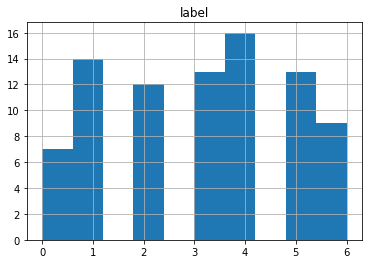

In [17]:
# Visualize test set distribution
pic_label.hist(column=['label'])

In [32]:
file_list = pic_label.as_matrix(columns=['photo'])

In [33]:
file_list = file_list.reshape(len(file_list))

In [34]:
file_list[0]

'0.png'